# 추가된 사항
- 기존의 feature: '에이치엘비', '일정', 'kosdaq_change'
- 여기에 '악재'를 추가하였습니다.
- 제목에 '-10%부터 -30%'까지 혹은 '하한가' 있다면 1 할당, 아니면 0 할당

# 데이터 수집

# 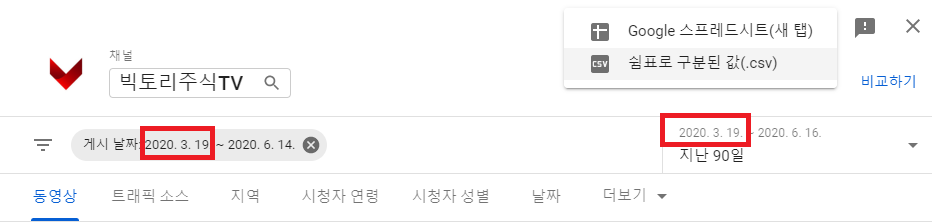

# 전처리 

## 불러오기

In [47]:
import numpy as np
import pandas as pd

df = pd.read_csv('표 데이터.csv')
df.head()

,동영상,동영상 제목,동영상 게시 시간,조회수,시청 시간(단위: 시간),구독자,추정 수익 (USD),노출수,노출 클릭률 (%)
0,합계,NaN,NaN,974790,73225.0067,1471,3214.514,7942494,8.13
1,zONfGalNqMY,"에이치엘비, 유상증자 뒤 급등사례 한미약품","Apr 20, 2020",15320,1836.3546,28,48.040,143608,7.51
2,4mzVtXuq4aQ,"에이치엘비, 임상3상 구두 발표 뉴스기사 나왔습니다. 수익 나는 기업의 모습을 갖춰...","May 30, 2020",14024,1210.0558,36,66.821,62390,15.47
3,Im2tab42mW4,에이치엘비 신주인수권 월요일 '매수/매도/가만히'를 준비하세요. (유상증자청약),"May 9, 2020",12166,1001.2145,32,51.584,85631,8.37
4,Qg1GIWW5Lbk,에이치엘비 무상증자는 6월4일 매수 후 하룻밤 지나야합니다. 레고켐바이오와 비디아이...,"Jun 1, 2020",10362,854.2180,16,21.224,66999,10.30


## Drop

In [48]:
df = df.drop(0)  # 첫줄(합계) row 삭제
df = df.drop(['동영상', '시청 시간(단위: 시간)','구독자','추정 수익 (USD)','노출수','노출 클릭률 (%)'], axis=1)  # 필요없는 column 삭제
df.head()

,동영상 제목,동영상 게시 시간,조회수
1,"에이치엘비, 유상증자 뒤 급등사례 한미약품","Apr 20, 2020",15320
2,"에이치엘비, 임상3상 구두 발표 뉴스기사 나왔습니다. 수익 나는 기업의 모습을 갖춰...","May 30, 2020",14024
3,에이치엘비 신주인수권 월요일 '매수/매도/가만히'를 준비하세요. (유상증자청약),"May 9, 2020",12166
4,에이치엘비 무상증자는 6월4일 매수 후 하룻밤 지나야합니다. 레고켐바이오와 비디아이...,"Jun 1, 2020",10362
5,에이치엘비 갭상승 이유는 MSCI 리밸런싱!! 그리고 높아지는 중국비중(ETF) |...,"May 29, 2020",10215


## 동영상 게시 시간
- Apr 20, 2020 → 2020-04-20
- FinanceDataReader와 Format 통일

In [49]:
df['동영상 게시 시간'] = pd.to_datetime(df['동영상 게시 시간'])
df.head()

,동영상 제목,동영상 게시 시간,조회수
1,"에이치엘비, 유상증자 뒤 급등사례 한미약품",2020-04-20,15320
2,"에이치엘비, 임상3상 구두 발표 뉴스기사 나왔습니다. 수익 나는 기업의 모습을 갖춰...",2020-05-30,14024
3,에이치엘비 신주인수권 월요일 '매수/매도/가만히'를 준비하세요. (유상증자청약),2020-05-09,12166
4,에이치엘비 무상증자는 6월4일 매수 후 하룻밤 지나야합니다. 레고켐바이오와 비디아이...,2020-06-01,10362
5,에이치엘비 갭상승 이유는 MSCI 리밸런싱!! 그리고 높아지는 중국비중(ETF) |...,2020-05-29,10215


## Feature
- 1월|2월|3월 == 1월 or 2월 or 3월
- 주의사항: 마지막에 | 쓰면 전부 or로 해당 됨. ex)-29%|-30%| (X) 

In [50]:
df['에이치엘비'] = (df['동영상 제목'].str.contains('에이치엘비')).astype(int)
df['일정'] = (df['동영상 제목'].str.contains('1월|2월|3월|4월|5월|6월|7월|8월|9월|10월|11월|12월|1일|2일|3일|4일|5일|6일|7일|8일|9일|10일|11일|12일|13일|13일|14일|15일|16일|17일|18일|19일|20일|21일|22일|23일|24일|25일|26일|27일|28일|29일|30일|31일|요일|내일|이번주|다음주')).astype(int) 
df['악재'] = (df['동영상 제목'].str.contains('하한가|-10%|-11%|-12%|-13%|-14%|-15%|-16%|-17%|-18%|-19%|-20%|-21%|-22%|-23%|-24%|-25%|-26%|-27%|-28%|-29%|-30%')).astype(int)
df['y_label'] = (df['조회수']>df['조회수'].mean()).astype(int)
df.head()

,동영상 제목,동영상 게시 시간,조회수,에이치엘비,일정,악재,y_label
1,"에이치엘비, 유상증자 뒤 급등사례 한미약품",2020-04-20,15320,1,0,0,1
2,"에이치엘비, 임상3상 구두 발표 뉴스기사 나왔습니다. 수익 나는 기업의 모습을 갖춰...",2020-05-30,14024,1,1,0,1
3,에이치엘비 신주인수권 월요일 '매수/매도/가만히'를 준비하세요. (유상증자청약),2020-05-09,12166,1,1,0,1
4,에이치엘비 무상증자는 6월4일 매수 후 하룻밤 지나야합니다. 레고켐바이오와 비디아이...,2020-06-01,10362,1,1,0,1
5,에이치엘비 갭상승 이유는 MSCI 리밸런싱!! 그리고 높아지는 중국비중(ETF) |...,2020-05-29,10215,1,0,0,1


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# KOSDAQ Change
- 주의사항: 업로드는 주말에도 하지만, 주가는 주말에는 없다.
- KS11 코스피지수
- KQ11 코스닥지수

## 불러오기

In [51]:
import FinanceDataReader as fdr

kq11 = fdr.DataReader('KQ11', '2020-01-01')
kq11.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-06-12,746.06,722.91,747.37,722.81,1.320000e+09,-0.0145
2020-06-15,693.15,745.60,747.21,693.15,1.470000e+09,-0.0709
2020-06-16,735.38,716.60,735.74,714.14,1.320000e+09,0.0609
2020-06-17,735.40,731.91,743.11,717.68,1.400000e+06,0.0000
2020-06-18,735.84,738.11,743.12,732.92,6.435700e+05,0.0006


## Change를 1,0으로 변환

In [52]:
kq11['Change'] = (kq11['Change'] > 0).astype(int)
kq11.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-06-12,746.06,722.91,747.37,722.81,1.320000e+09,0
2020-06-15,693.15,745.60,747.21,693.15,1.470000e+09,0
2020-06-16,735.38,716.60,735.74,714.14,1.320000e+09,1
2020-06-17,735.40,731.91,743.11,717.68,1.400000e+06,0
2020-06-18,735.84,738.11,743.12,732.92,6.435700e+05,1


# 동영상 게시 시간에 해당하는 KOSDAQ Change 찾아서 병합
- 차후 좀 더 간단한 코드로 변경
- 주말은 change=1

In [53]:
list = []
for i in range(len(df)):
    try:
        list.append(kq11.loc[df['동영상 게시 시간'][i+1]]['Change'])
    except:
        list.append(1.0)
list[:5]

[1.0, 1.0, 1.0, 1.0, 1.0]

In [54]:
df['kosdaq_change'] = list
df.head()

,동영상 제목,동영상 게시 시간,조회수,에이치엘비,일정,악재,y_label,kosdaq_change
1,"에이치엘비, 유상증자 뒤 급등사례 한미약품",2020-04-20,15320,1,0,0,1,1.0
2,"에이치엘비, 임상3상 구두 발표 뉴스기사 나왔습니다. 수익 나는 기업의 모습을 갖춰...",2020-05-30,14024,1,1,0,1,1.0
3,에이치엘비 신주인수권 월요일 '매수/매도/가만히'를 준비하세요. (유상증자청약),2020-05-09,12166,1,1,0,1,1.0
4,에이치엘비 무상증자는 6월4일 매수 후 하룻밤 지나야합니다. 레고켐바이오와 비디아이...,2020-06-01,10362,1,1,0,1,1.0
5,에이치엘비 갭상승 이유는 MSCI 리밸런싱!! 그리고 높아지는 중국비중(ETF) |...,2020-05-29,10215,1,0,0,1,1.0


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Machine Learning

In [55]:
X = df[['에이치엘비','일정', 'kosdaq_change', '악재']]
y = df['y_label']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
logreg.score(X_test, y_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7571428571428571

In [58]:
pred = logreg.predict([[0,1,1,1]])
print(pred)

[0]


## 확률

In [59]:
logreg.predict_proba([[1,0,0,0]]) # 에이치엘비

array([[0.32363379, 0.67636621]])

In [60]:
logreg.predict_proba([[1,0,0,1]]) # 에이치엘비 + 악재

array([[0.24857165, 0.75142835]])

In [61]:
logreg.predict_proba([[1,1,0,0]]) # 에이치엘비 + 일정

array([[0.12409492, 0.87590508]])

In [62]:
logreg.predict_proba([[1,1,0,1]]) # 에이치엘비 + 일정 + 악재

array([[0.08920883, 0.91079117]])

## 결론
에이치엘비+일정+악재가 조회수가 높다.

중요도는 순서대로 1.에이치엘비 2.일정 3.악재